# PROJECT #2 - CLASSIFICATION

## Step 1 - Importing the dataset

In [1]:
import pandas as pd
df_orig = pd.read_csv('Telco_Customer_Churn.csv')

df_orig.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,DeviceProtection,TechSupport,CableService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,Yes,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2 - Perfoming the preprocessing

In [2]:
# dropping 'CustomerID' column
df_clean = df_orig.drop(axis=0, columns=['customerID']) 

In [3]:
df_clean.dtypes

gender               object
SeniorCitizen         int64
Dependents           object
tenure                int64
PhoneService         object
InternetService      object
DeviceProtection     object
TechSupport          object
CableService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# converting string to number of 'TotalCharges' column
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace({' ': ''}, regex=True)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], downcast='float')

In [5]:
df_clean.dtypes

gender               object
SeniorCitizen         int64
Dependents           object
tenure                int64
PhoneService         object
InternetService      object
DeviceProtection     object
TechSupport          object
CableService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [6]:
# verifying the total of null values
df_clean.isnull().sum()

gender               0
SeniorCitizen        0
Dependents           0
tenure               0
PhoneService         0
InternetService      0
DeviceProtection     0
TechSupport          0
CableService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# dropping null values
df_clean.dropna(inplace=True)

In [8]:
df_clean.isnull().sum()

gender              0
SeniorCitizen       0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
DeviceProtection    0
TechSupport         0
CableService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df_clean.shape

(7032, 15)

In [10]:
# converting categorical variables to dummies
df_full = pd.get_dummies(df_clean, drop_first=True)

In [11]:
df_full.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Dependents_Yes,PhoneService_Yes,InternetService_Yes,DeviceProtection_Yes,TechSupport_Yes,CableService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.850000,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.500000,1,0,1,1,1,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,1,1,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.750000,1,0,0,1,1,1,0,1,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,1,1,0,0,0,0,0,1,0,1,0,1


In [12]:
df_full.shape

(7032, 18)

## Step 3 - Implementing the Logistic Regression using the full dataset

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df_full.drop('Churn_Yes', axis=1)
y = df_full['Churn_Yes'].copy()

# variable to define the random state of the processing
random_state = 42

logreg = LogisticRegression(max_iter=10000, random_state=random_state)
logreg.fit(X, y)

# predicting using the own X
y_pred = logreg.predict(X)
print("-----------------------------------------------------\n")
print("Logistic Regression Model Score (full dataset): %.3f" % logreg.score(X, y))
print("\n-----------------------------------------------------")

-----------------------------------------------------

Logistic Regression Model Score (full dataset): 0.797

-----------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


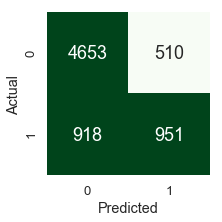

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# creating the Confusion Matrix
cm_lr = pd.DataFrame(confusion_matrix(y, y_pred), columns=np.unique(y), index = np.unique(y))
cm_lr.index.name = 'Actual'
cm_lr.columns.name = 'Predicted'

plt.figure(figsize = (3,3))
sns.set(font_scale=1.2)

sns.heatmap(cm_lr, annot=True, annot_kws={"size": 18}, cbar=False, vmax=650, square=True, fmt="d", cmap="Greens")

In [15]:
# creating the Classification Report
from sklearn.metrics import classification_report

print("----------------------------------------------------------")
print("Classification Report - Logistic Regression (full dataset)\n")
print(classification_report(y, y_pred))

----------------------------------------------------------
Classification Report - Logistic Regression (full dataset)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5163
           1       0.65      0.51      0.57      1869

   micro avg       0.80      0.80      0.80      7032
   macro avg       0.74      0.71      0.72      7032
weighted avg       0.79      0.80      0.79      7032



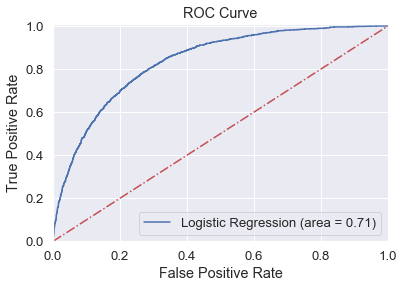

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# creating the ROC Curve (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y, y_pred))
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('LogReg_ROC')
plt.show()

In [17]:
# getting the 'odds ratios' from the model
pd.DataFrame(zip(X.columns, logreg.coef_[0], np.exp(logreg.coef_[0])),
             columns=['Variables', 'Coefficients', 'Odds Ratio'])

,Variables,Coefficients,Odds Ratio
0,SeniorCitizen,0.289120,1.335252
1,tenure,-0.078535,0.924469
2,MonthlyCharges,0.015648,1.015771
3,TotalCharges,0.000406,1.000406
4,gender_Male,-0.155258,0.856194
5,Dependents_Yes,-0.305607,0.736676
6,PhoneService_Yes,-0.481387,0.617926
7,InternetService_Yes,0.074793,1.077661
8,DeviceProtection_Yes,-0.123173,0.884110
9,TechSupport_Yes,-0.435762,0.646771


## Step 4 - Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Dependents_Yes,PhoneService_Yes,InternetService_Yes,DeviceProtection_Yes,TechSupport_Yes,CableService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3946,0,9,58.50,539.849976,0,0,0,1,1,1,1,0,0,0,0,0,1
3394,0,26,61.55,1581.949951,1,0,1,1,0,0,0,1,0,0,0,1,0
1635,0,3,69.95,220.449997,0,0,1,1,1,0,1,1,0,1,0,1,0
4088,0,7,73.60,520.000000,1,0,1,1,0,0,0,0,0,0,0,1,0
1886,0,67,60.40,3953.699951,1,1,1,1,1,1,0,0,1,1,0,0,0


## Step 5 - Using pipeline with some scikit-learn models

In [19]:
# Loading required libraries
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [20]:
# naming the classifiers
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Neural Net", 
         "Decision Tree", "Naive Bayes", "Random Forest", "Bagging", "AdaBoost", "XGBoost"]

# defining the variable to store the classificatin scores
scores = []

# defining the classifiers
classifiers = [
    LogisticRegression(random_state=random_state),
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, random_state=random_state),
    SVC(gamma=2, C=1, random_state=random_state),
    MLPClassifier(alpha=0.001, solver='lbfgs', learning_rate='adaptive', max_iter=1000, random_state=random_state),
    DecisionTreeClassifier(max_depth=5, random_state=random_state),
    GaussianNB(),
    RandomForestClassifier(max_depth=10, n_estimators=80, max_features=5, random_state=random_state),
    BaggingClassifier(random_state=random_state),
    AdaBoostClassifier(random_state=random_state),
    XGBClassifier(random_state=random_state)]

# executing the pipeline
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(X_train, y_train)   
    print(classifier)
    scores.append(pipeline.score(X_test, y_test))
    print("model score: %.3f" % pipeline.score(X_test, y_test))
    print("-----------------------------------------------------------------------------------\n")
    
# creating a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
model score: 0.791
-----------------------------------------------------------------------------------

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')
model score: 0.759
-----------------------------------------------------------------------------------

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
model score: 0.788
-----------------------------------------------------------------------------------

SVC(C=1, cache_size=

## Step 6 - Selecting the Best Model and Evaluating its performance

In [21]:
# ordering the scores to get the best model
scores_df.sort_values(by='Accuracy Score', ascending=False)

,Classifier,Accuracy Score
7,Random Forest,0.796682
0,Logistic Regression,0.790521
9,AdaBoost,0.789100
2,Linear SVM,0.787678
4,Neural Net,0.787204
10,XGBoost,0.781043
5,Decision Tree,0.778673
8,Bagging,0.764929
1,Nearest Neighbors,0.759242
3,RBF SVM,0.745498


Based on the results from various models, the best model is **Random Forest**.

In [22]:
# recreating the best model with the defined parameters
rf = RandomForestClassifier(max_depth=10, n_estimators=80, max_features=5, random_state=random_state)

# training the model
rf.fit(X_train, y_train)

# predicting
y_pred_rf = rf.predict(X_test)

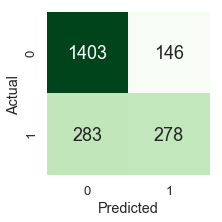

In [23]:
# creating the Confusion Matrix
cm_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), columns=np.unique(y_test), index = np.unique(y_test))
cm_rf.index.name = 'Actual'
cm_rf.columns.name = 'Predicted'
plt.figure(figsize = (3,3))
sns.set(font_scale=1.2)
sns.heatmap(cm_rf, annot=True, annot_kws={"size": 18}, cbar=False, vmax=650, square=True, fmt="d", cmap="Greens")

In [24]:
print("-----------------------------------------------------")
print("Classification Report - Random Forest\n")
print(classification_report(y_test, y_pred_rf))

-----------------------------------------------------
Classification Report - Random Forest

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.56       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



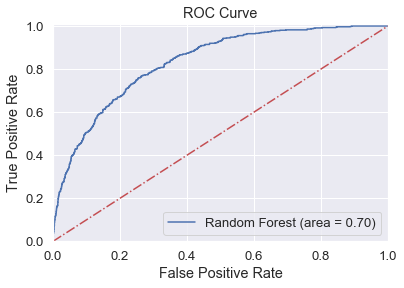

In [25]:
# creating the ROC Curve (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

## Step 7 and 8 - Predicting the class and probability of specific customer

**Customer Profile:**
- 'SeniorCitizen' = 0
- 'tenure'= 32
- 'MonthlyCharges' = 64.75
- 'TotalCharges' = 2,283.30
- 'gender_Male' = yes
- 'Dependents_Yes' = no
- 'PhoneService_Yes' = yes
- 'InternetService_Yes' = yes
- 'DeviceProtection_Yes' = no
- 'TechSupport_Yes' = no
- 'CableService_Yes' = yes
- 'Contract_One year' = no
- 'Contract_Two year' = no
- 'PaperlessBilling_Yes' = yes
- 'PaymentMethod_Credit card (automatic)' = yes
- 'PaymentMethod_Electronic check' = no
- 'PaymentMethod_Mailed check' =  no

In [26]:
# customer profile
customer = [[0, 32, 64.75, 2283.30, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]]

In [27]:
# predicting the class
cust_pred_rf = rf.predict(customer)[0]
# predicting the probability
cust_prob_rf = rf.predict_proba(customer)

print("-----------------------------------------------------------------------------")

if cust_pred_rf == 0:
    print("Predicted Class using Random Forest is 'No Churn' with a probability of %.3f" % cust_prob_rf[0][0])
else:
    print("Predicted Class using Random Forest is 'Churn' with a probability of %.3f" % cust_prob_rf[0][1])

print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
Predicted Class using Random Forest is 'No Churn' with a probability of 0.843
-----------------------------------------------------------------------------
